# Simple Linear Regression

Linear model equations
```
y = xw + b
```

* w and b vary
* y are closes the targets (t)

**References**

* https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.uniform.html
* http://mathworld.wolfram.com/UniformDistribution.html



In [172]:
import numpy as np # Use for math operations
import matplotlib.pyplot as plt # Use for graphs
import mpl_toolkits.mplot3d as Axes3D # Use for 3D graphs

## Generate random input data to train on

From the linear model theory, `inputs = n * k = 1000 * 2`
Create a input data like 1000*2 matrix means 2 variable problems with 1000 observations

In [173]:
# Create a variable to hold the size of the datasets that we want to generate
observations = 1000

# Draw samples from a uniform distribution
x = np.random.uniform(low=-10, high=10, size=(observations, 1))
z = np.random.uniform(low=-10, high=10, size=(observations, 1))

"""
Combine above samples into 1 matrix.
Use column_stack function which takes a seq of 1D array and
stacks them into a single 2D array, which results into matrix of 1000 * 2

Note: Dimension are important in Linear Algebra, as we can only multiple
matrix that are compatible.

We want to make sure we can multiple x times w since our Linear model relies on that.

We have create a input data (1000*2 matrix), means 2 variables problems with 1000 observations.
"""
inputs = np.column_stack((x, z))

# Lets know the shape of the input to verify the results
print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In supervized learning, below are the elements of the model:

1. Inputs
2. Weights
3. Biases
4. Outputs
5. Targets

**Notes**

* 2 major parameters are `inputs` and `targets`.
* We also need to generate targets.
* Weights, Biases and Outputs varies based on the algorithms.

Consider a targets = `f(x, z) = 2*x - 3*z + 5 + noise`. (*Completely arbitrarily chosen, We can try different functions as well.*)

Conceptually, the algorithm must learn this is the function and the Weights are `2` and `-3`
and the Bias is `5`.

We are introducing noice will make data bit random. Real data always contents noise.

In [174]:
noise = np.random.uniform(low=-1, high=1, size=(observations, 1))

targets = 2*x - 3*z + 5 + noise
# targets = 13*x - 7*z - 12 + noise # Try diff formula values

# Lets verify the shape of target after the x and z are applied
print(targets.shape)

(1000, 1)


## Plot the training data (Optional)

Lets plot the data to show a strong Linear relationship

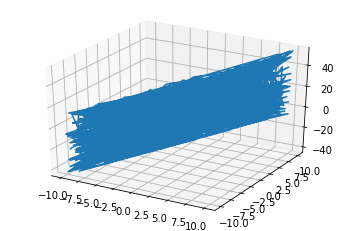

In [175]:
targets = targets.reshape(observations, )

fig = plt.figure()
fig.add_subplot(111, projection="3d")
plt.plot(x, x, targets)

plt.show()
targets = targets.reshape(observations, 1)

## Initialize variables

In [176]:
"""
Our initial weights and biases will be picked randomly
from the interval [-0.1, 0.1]

We will generate them using uniform function as we did above.
"""
init_range = 0.1

# Weights is of size 2*1
weights = np.random.uniform(-init_range, init_range, size=(2, 1))

# Biases is a scale 1*1
biases = np.random.uniform(-init_range, init_range, size=1)

## Set a learning rate

In [177]:
# You can see how different etas affect the speed of optimization
learning_rate = 0.02 # etas

## Train the model

Since this is an iterative problem, we need an iteration which has below steps:

1. Calculate outputs
2. Campare outputs to targets through the loss function (L2-norm loss function)
3. Adjust weights and biases
4. Repeat steps from (1) to (3) util we get the better match



In [178]:
# Follow the Linear model equation (Y = xw + b)

for i in range (100):
    
    """
    Calculates the outputs by given weights and biases
    """
    outputs = np.dot(inputs, weights) + biases
    
    """
    Record the difference between outputs and targets
    """
    deltas = outputs - targets
    
    """
    Calculate the loss function that compares the outputs to the targets
    Use L2-norm loss/2 function to calculate the loss
    """
    loss = np.sum(deltas ** 2) / 2 / observations
    
    """
    Print the loss for analysis to see at each step, whether the loss is decreasing
    """
    print(loss)
    
    deltas_scaled = deltas / observations
    
    """
    Updates the weights and biases by following the Gradient descent methodology
    """
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled) 

230.97643801072036
36.905039609978324
14.63703097341999
11.722676323269079
11.003395488115856
10.54676050966037
10.13451506124074
9.741482169870737
9.364263504892545
9.001938190789394
8.65388603960874
8.319541147734837
7.998363273381593
7.689833832375818
7.393454706434501
7.108747398781766
6.835252257064518
6.572527730736483
6.32014965812743
6.077710581638765
5.8448190899134715
5.621099185912888
5.406189679879638
5.199743606206479
5.001427663269692
4.810921675322584
4.627918075580366
4.452121409661879
4.2832478585864395
4.121024780555754
3.965190270781078
3.8154927386449944
3.6716905015151258
3.5335513945540566
3.4008523958954457
3.273379266581236
3.1509262046786235
3.0332955130183903
2.9202972800181435
2.811749073075189
2.7074756440340035
2.607308646252812
2.5110863628124735
2.418653445428865
2.3298606636472683
2.244564663913817
2.16262773813505
2.0839176013519047
2.008307178169214
1.935674397595898
1.8659019959646514
1.7988773276128986
1.7344921830194167
1.6726426141029702
1.61322876

## Print weights and biases and see if we have worked correctly!

In [179]:
print(weights, biases)

[[ 2.0051535 ]
 [-2.99552114]] [4.32702781]


## Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closed this plot is to a 45 degree line, the closer target and output values are.

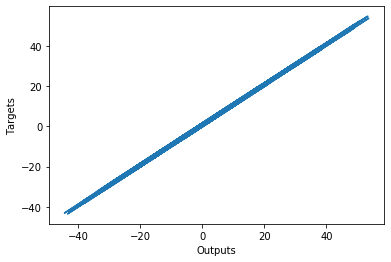

In [180]:
plt.plot(outputs, targets)
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.show()